## Ford Gobike Data Exploration


In [164]:
#Importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic

%matplotlib inline
pd.set_option("display.max_columns", None)


In [165]:
# Read csv files into a pandas dataframe
df_bike = pd.read_csv("201902-fordgobike-tripdata.csv")
#display first 5 rows in dataset
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [166]:
#check the dataset features types and shape
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

From dataset info, we can see that:
1. Dataset shape (183412,13)
2. ID'S columns `start_station_id`, `end_station_id`, `end_station_id` and `bike_id`
3. Based on (`start_station_latitude`,`start_station_longitude`) and (`end_station_latitude`,`end_station_latitude`) we can extract distance feature to help at analysis
4. `member_birth_year`, `member_gender`, `start_station_name` and `end_station_name` have missing values
5. `start_time` and `end_time` saved as an object, will convert it to DateTime type to extract new time features

In [167]:
#drop ID'S columns
df_bike.drop(['start_station_id' , 'end_station_id' , 'end_station_id','bike_id'], axis=1, inplace=True)

In [168]:
#function to extract distance based on lat and log
def Distance(start_latitude, start_longitude, end_latitude, end_longitude):
    coords_1 = (start_latitude, start_longitude)
    coords_2 = (end_latitude, end_longitude)
    return geodesic(coords_1, coords_2).km
#Add distance feature
df_bike['distance_km'] = df_bike.apply(lambda x: Distance(x['start_station_latitude'], x['start_station_longitude'],
                                                           x['end_station_latitude'], x['end_station_longitude']), axis=1)


In [169]:
#drop lat and log columns
df_bike.drop(['start_station_latitude' , 'start_station_longitude' , 'end_station_latitude','end_station_longitude'], axis=1, inplace=True)

In [170]:
#check missing values in dataset
df_bike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_name          197
end_station_name            197
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
distance_km                   0
dtype: int64

In [171]:
#drop missing values
df_bike.dropna(inplace=True)

In [172]:
# Number of unique values in Features 
df_bike.nunique()

duration_sec                 4429
start_time                 174941
end_time                   174939
start_station_name            329
end_station_name              329
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
distance_km                 13760
dtype: int64

In [173]:
#convert member_birth_year to ages
df_bike['member_age'] = (2021 - df_bike['member_birth_year']).astype('int')
#drop member_birth_year column
df_bike.drop('member_birth_year',axis=1,inplace=True)

In [174]:
#convert duration_sec to duration_min
df_bike['duration_min'] = (df_bike['duration_sec']/60).astype('int')
#drop duration_sec column
df_bike.drop('duration_sec',axis=1,inplace=True)

In [175]:
#descriptive statistics for dataset
df_bike.describe()

,distance_km,member_age,duration_min
count,174952.000000,174952.000000,174952.000000
mean,1.689939,36.196865,11.241461
std,1.096526,10.118731,27.371269
min,0.000000,20.000000,1.000000
25%,0.909710,29.000000,5.000000
50%,1.428159,34.000000,8.000000
75%,2.224675,41.000000,13.000000
max,69.465977,143.000000,1409.000000


Based on descriptive statistics of `duration_sec` , `distance_km` and `member_age` they have ouliers values will effect the analysis of data

In [176]:
#function to detect outliers in data
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return outliers

In [177]:
#get the min value of outliers
print(f'duration_min : min value of outliers {min(detect_outlier((df_bike.duration_min)))}')
print(f'member_age : min value of outliers {min(detect_outlier((df_bike.member_age)))}')
print(f'distance_km : min value of outliers {min(detect_outlier((df_bike.distance_km)))}')

duration_min : min value of outliers 25
member_age : min value of outliers 59
distance_km : min value of outliers 4.197528928610675


In [178]:
# drop outliers index with age >= 59 years
df_bike.drop(df_bike.index[df_bike['member_age'] >= 59],inplace=True)
# drop outliers index with with distance >= 4.197528928610675
df_bike.drop(df_bike.index[df_bike.distance_km >= 4.197528928610675 ] ,inplace=True)
# drop index with with distance = 0
df_bike.drop(df_bike.index[df_bike.distance_km == 0 ] ,inplace=True)
# drop outliers index with with duration >= 25
df_bike.drop(df_bike.index[df_bike.duration_min >= 25 ] ,inplace=True)
#check the shape after clean
df_bike.shape

(154151, 10)

In [179]:
#Any duplicated rows ?
df_bike.duplicated().sum()

0

In [180]:
#change type of time data from object to datetime to extract features
df_bike[['start_time' , 'end_time']] = df_bike[['start_time' , 'end_time']].apply(pd.to_datetime).values.astype('<M8[m]')
#extract start_day and start_time for start date , hour and day name from start_time column
df_bike['start_day'] = df_bike['start_time'].dt.day_name()
df_bike['start_trip__time'] = pd.to_datetime(df_bike['start_time'], format='%H:%M').dt.time
#get colums for end  date , hour and day namefrom end_time column
df_bike['end_day'] = df_bike['end_time'].dt.day_name()
df_bike['end_trip_time'] = pd.to_datetime(df_bike['end_time'], format='%H:%M').dt.time

In [181]:
#number of days with different start and end day
len(df_bike[df_bike['start_day'] != df_bike['end_day']])

116

In [182]:
# drop index with trips don't end at the same day
df_bike = df_bike.drop(df_bike.index[df_bike['start_day'] != df_bike['end_day']])
#get one column for trip day
df_bike['trip_day'] = df_bike['start_day']
#drop 'start_day', 'end_day', start_time and end_time columns
df_bike.drop(['start_day' , 'end_day','start_time','end_time'], axis=1, inplace=True)

In [184]:
#check changes
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154035 entries, 16 to 183411
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_station_name       154035 non-null  object 
 1   end_station_name         154035 non-null  object 
 2   user_type                154035 non-null  object 
 3   member_gender            154035 non-null  object 
 4   bike_share_for_all_trip  154035 non-null  object 
 5   distance_km              154035 non-null  float64
 6   member_age               154035 non-null  int32  
 7   duration_min             154035 non-null  int32  
 8   start_trip__time         154035 non-null  object 
 9   end_trip_time            154035 non-null  object 
 10  trip_day                 154035 non-null  object 
dtypes: float64(1), int32(2), object(8)
memory usage: 12.9+ MB


### What is the structure of your dataset?
dataset contains  183412 rows and 16 columns
after Wrangling and cleaning process  dataset contains  154035 rows and 11 columns
### What is/are the main feature(s) of interest in your dataset?
I'm most interested in what parameters affect trip duration
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that the member_gender , member_age , user_type  , distance and start day and time  will help me at this analysis

## Univariate Exploration


- lets explore the individual variables which help us at our analysis

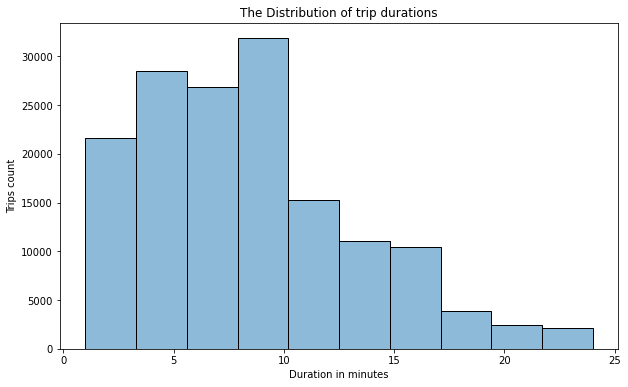

In [195]:
#the distribution of trip durations
plt.figure(figsize = [10, 6])
sns.histplot(df_bike.duration_min , alpha= 0.5, bins =10 );
plt.xlabel("Duration in minutes")
plt.ylabel("Trips count")
plt.title("The Distribution of trip durations")
plt.show()

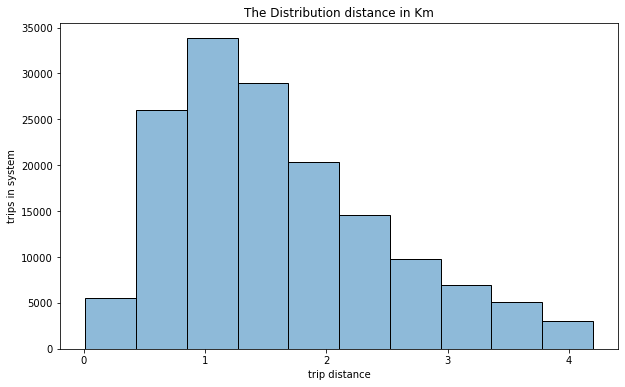

In [194]:
#the distribution of distance 
plt.figure(figsize = [10, 6])
sns.histplot( df_bike.distance_km, alpha= 0.5, bins =10 );
plt.xlabel("trip distance")
plt.ylabel("trips in system")
plt.title("The Distribution distance in Km")

plt.show()

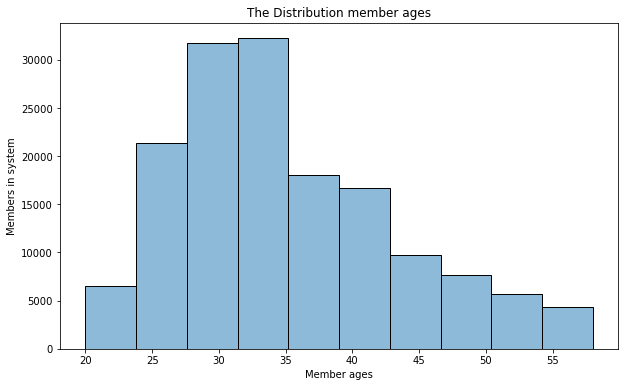

In [193]:
#the distribution of member_age 
plt.figure(figsize = [10, 6])
sns.histplot( df_bike.member_age, alpha= 0.5, bins =10 );
plt.xlabel("Member ages")
plt.ylabel("Members in system")
plt.title("The Distribution member ages")
plt.show()

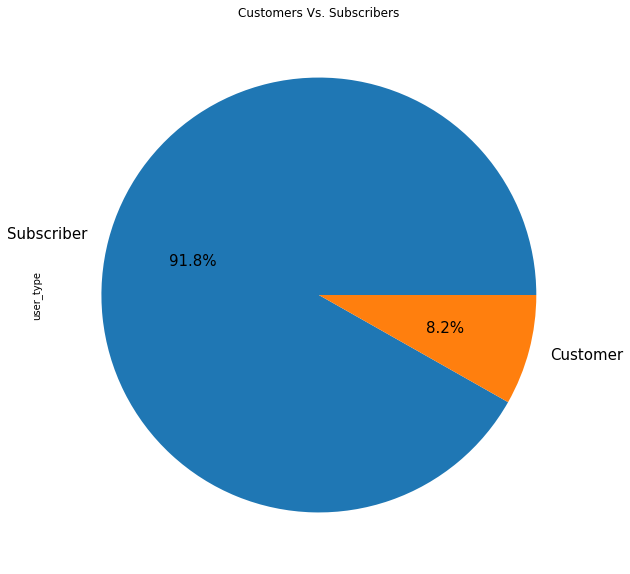

In [196]:
df_bike.user_type.value_counts().plot(kind='pie', figsize=(10,10),fontsize =15, autopct='%1.1f%%')
plt.title("Customers Vs. Subscribers");
plt.show()

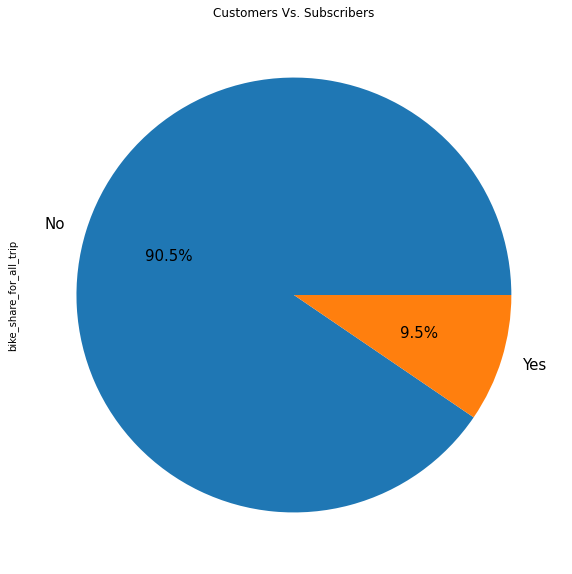

In [200]:
df_bike.bike_share_for_all_trip.value_counts().plot(kind='pie', figsize=(10,10),fontsize =15, autopct='%1.1f%%')
plt.title("Customers Vs. Subscribers");
plt.show()

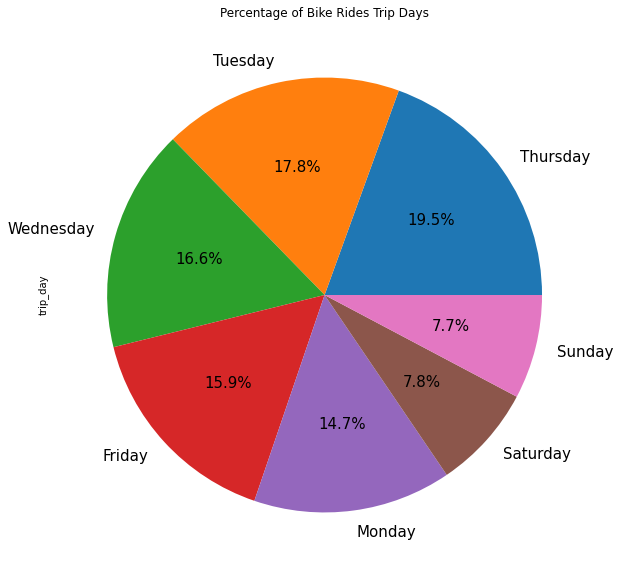

In [197]:
df_bike.trip_day.value_counts().plot(kind='pie', figsize=(10,10),fontsize =15, autopct='%1.1f%%' ,)
plt.title("Percentage of Bike Rides Trip Days");

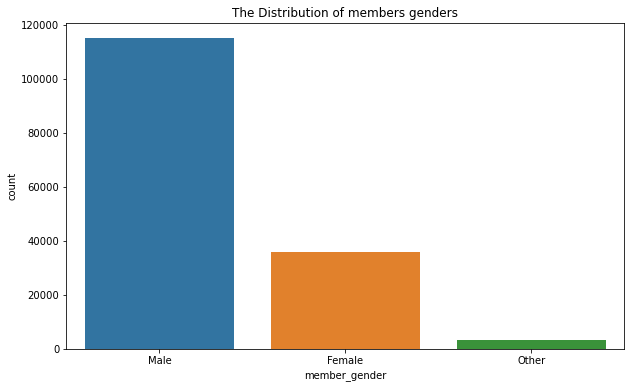

In [198]:
#the distribution of member_gender 
plt.figure(figsize = [10, 6])
sns.countplot(data=df_bike, x='member_gender');
plt.title("The Distribution of members genders");


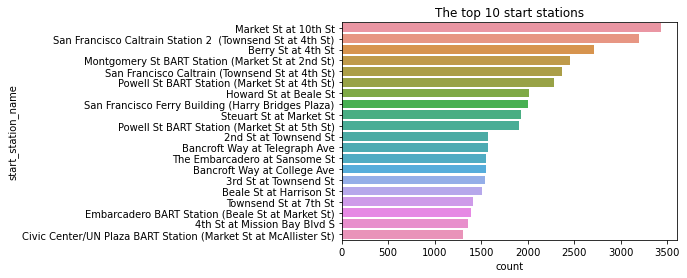

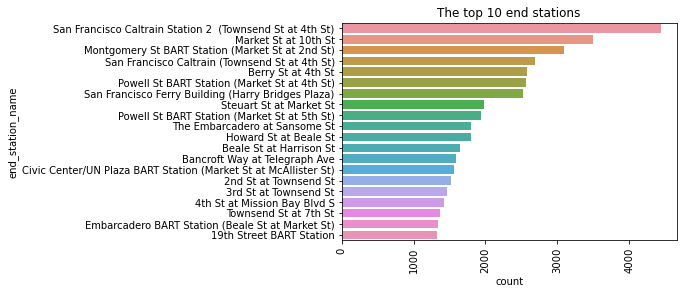

In [210]:
#the distribution of start station 
freq = df_bike['start_station_name'].value_counts()[0:20]
order = freq.index
sns.countplot(data=df_bike, y='start_station_name', order=order);
plt.title("The top 10 start stations");
plt.show()

#the distribution of end station
freq = df_bike['end_station_name'].value_counts()[0:20]
order = freq.index
sns.countplot(data=df_bike, y='end_station_name', order=order);
plt.xticks(rotation=90);
plt.title("The top 10 end stations");
plt.show()



- most of trips duration are less 10 minutes
- males are the most member gender
- range of members age between 25 and 53 are the most common
- most trips are between market St at 10th ST and San Francisco Caltrain Station 2  (Townsend St at 4th St) 
- most used days are work days 

### Bivariate Exploration


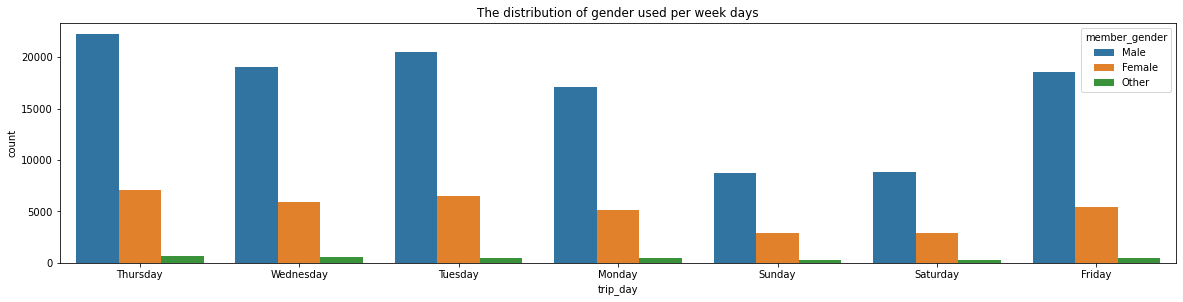

In [220]:
plt.figure(figsize = [20, 15])
plt.subplot(3, 1, 1)
sns.countplot(data = df_bike, x = 'trip_day', hue = 'member_gender');
plt.title("The distribution of gender used per week days");
plt.show()

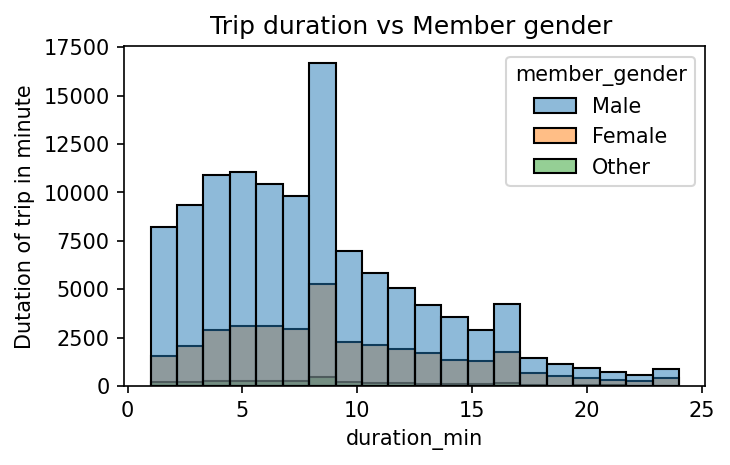

In [226]:
#distrbution of member gender and duration of trip
plt.figure(figsize=(5,3),dpi=150)
sns.histplot(data = df_bike ,x ='duration_min',bins=20,hue='member_gender')
plt.xticks(rotation=0);
plt.ylabel('Dutation of trip in minute');
plt.title("Trip duration vs Member gender ");


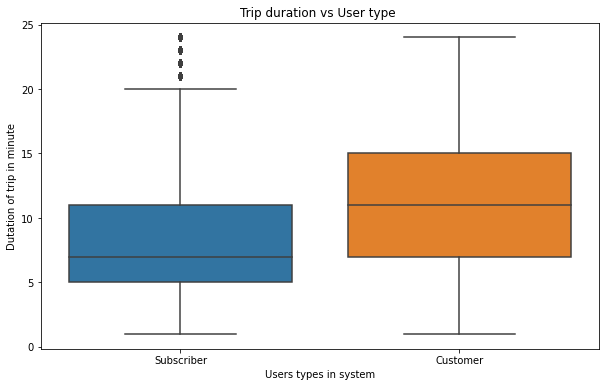

In [227]:
#distrbution of member gender and duration of trip
plt.figure(figsize=[10,6])
sns.boxplot(data=df_bike, x='user_type', y='duration_min')
plt.ylabel('Dutation of trip in minute');
plt.xlabel('Users types in system');
plt.title("Trip duration vs User type ");


- more subscriber have short trips than customers

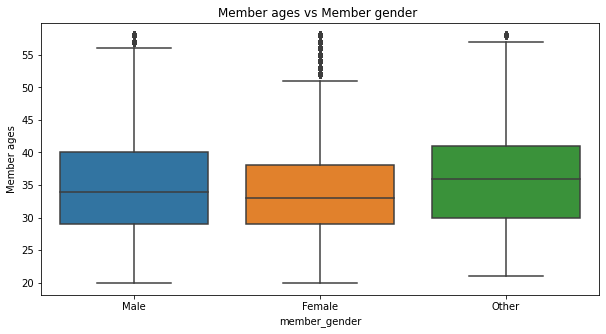

In [228]:
#distrbution of member gender and ages
plt.figure(figsize = [10, 5])
sns.boxplot(data=df_bike, x='member_gender', y='member_age')
plt.xticks(rotation=0);
plt.ylabel('Member ages');
plt.title("Member ages vs Member gender ");


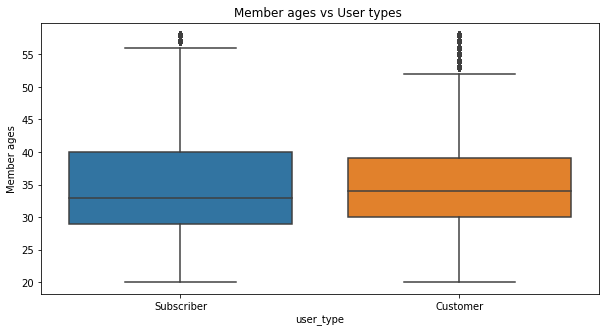

In [229]:
#distrbution of user_type and ages
plt.figure(figsize = [10, 5])
sns.boxplot(data=df_bike, x='user_type', y='member_age')
plt.xticks(rotation=0);
plt.ylabel('Member ages');
plt.title("Member ages vs User types ");


### Multivariate Exploration
- explore more the 2 variables

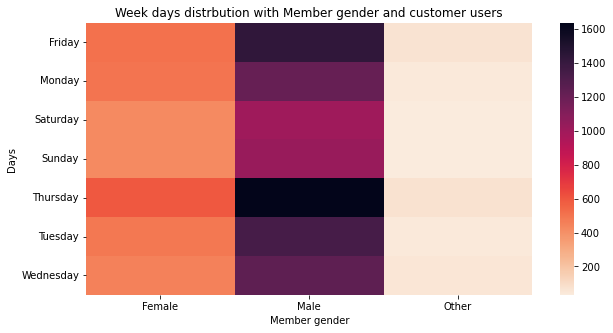

In [232]:
#Week days distrbution with Member gender and customer users
customers = df_bike.query('user_type == "Customer"')
ct_coun = customers.groupby(['trip_day', 'member_gender']).size()
ct_coun = ct_coun.reset_index(name='count')
ct_coun = ct_coun.pivot(index='trip_day', columns='member_gender', values='count')
plt.figure(figsize = [10, 5]);
sns.heatmap(ct_coun, cmap='rocket_r');
plt.xlabel('Member gender');
plt.ylabel('Days');
plt.title("Week days distrbution with Member gender and customer users");


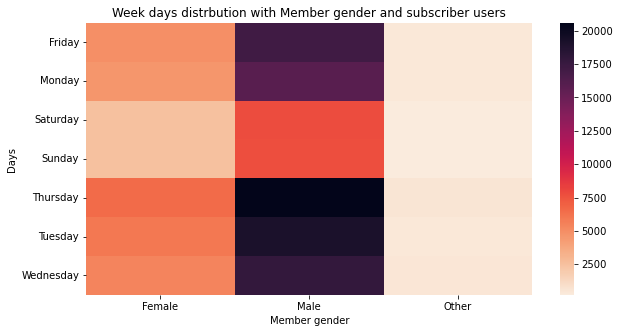

In [233]:
#Week days distrbution with Member gender and subscriber users
subscribers = df_bike.query('user_type == "Subscriber"')
st_coun = subscribers.groupby(['trip_day', 'member_gender']).size()
st_coun = st_coun.reset_index(name='count')
st_coun = st_coun.pivot(index='trip_day', columns='member_gender', values='count')
plt.figure(figsize = [10, 5]);
sns.heatmap(st_coun, cmap='rocket_r');
plt.title("Week days distrbution with Member gender and subscriber users");
plt.xlabel('Member gender');
plt.ylabel('Days');